In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
dataset = pd.read_csv('./housing_dataset.csv')

In [3]:
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


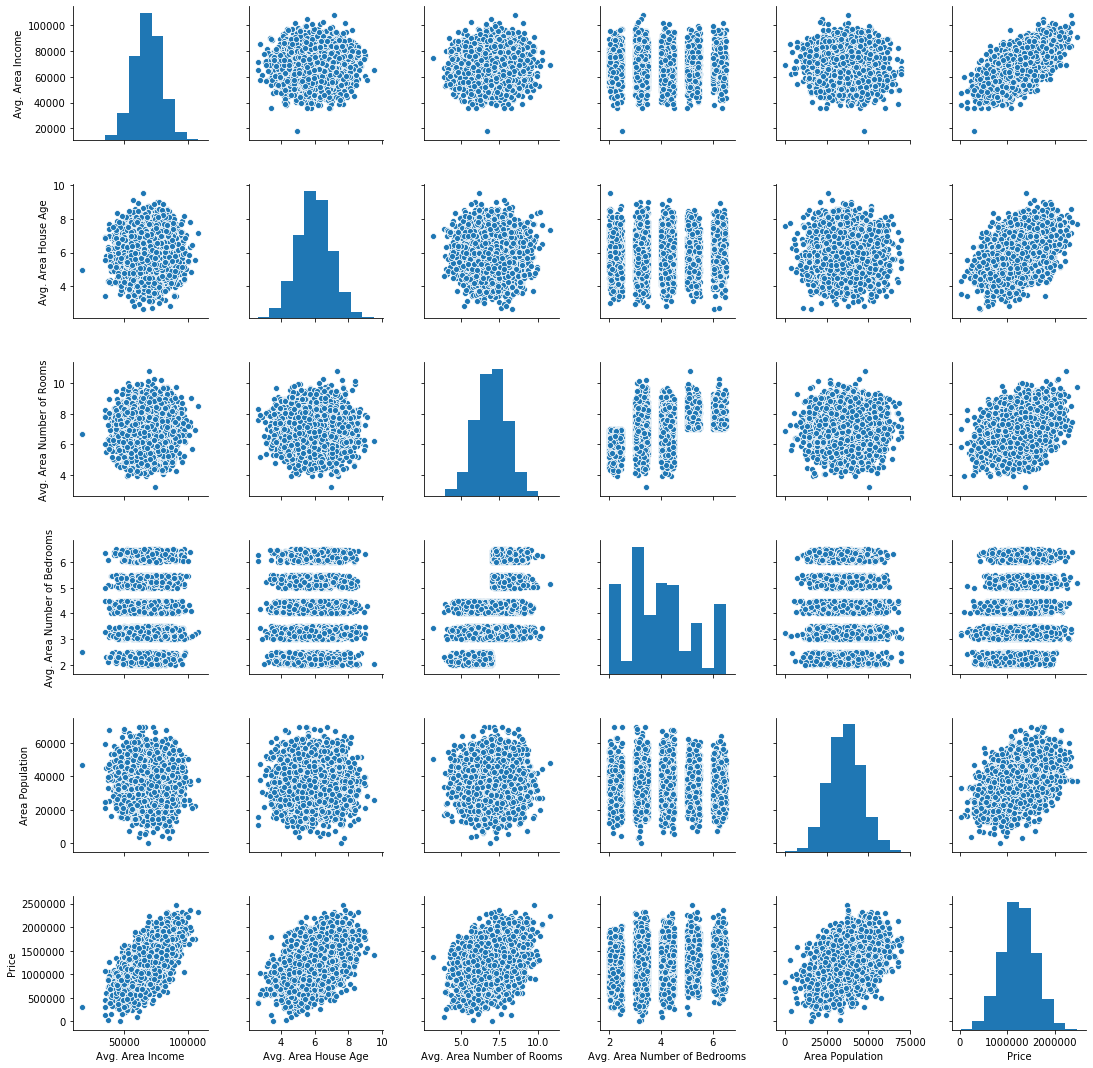

In [4]:
sns.pairplot(dataset)

In [5]:
X = dataset[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = dataset['Price']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=21)

In [7]:
linearRegression = LinearRegression()
linearRegression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
coeff_difference = pd.DataFrame(linearRegression.coef_,X.columns,columns=['Coefficient'])
coeff_difference

,Coefficient
Avg. Area Income,21.401503
Avg. Area House Age,164740.451711
Avg. Area Number of Rooms,120223.143604
Avg. Area Number of Bedrooms,1197.961534
Area Population,15.090864


In [9]:
predictions = linearRegression.predict(X_test)

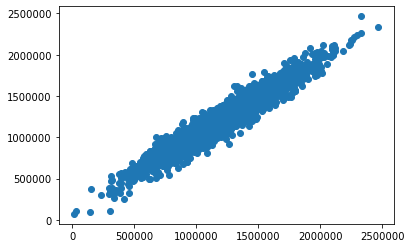

In [10]:
plt.scatter(y_test, predictions)

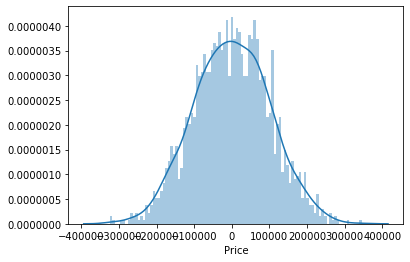

In [11]:
sns.distplot((y_test-predictions),bins=100);

In [12]:
metrics.mean_squared_error(y_test, predictions)

10099889164.114399

In [13]:
r2_score(y_test, predictions)

0.9222036921899339